# CS5950J Course Project

This project recaps and systematises work that has been done in the exercise notebooks: if you have worked through the notebooks, little extra work is required.  The aim of the project is to give you the experience of trying to develop a neural network classifier (or regressor), involving setting up a model, optimising the amount of regularisation, investigating its performance, and devising a new model. 

You should do your work in this notebook, filling in the sections below. To do the work, you may re-use code from ***any of the lab-session sheets provided so far***. (In fact, you should be able to do nearly the entire project using code taken from previous lab sessions.) 

Please complete this workbook and submit it on Moodle, with all outputs (numbers and graphs) visible and included. (I do not want to have to evaluate your notebook!) 

Ideally, do not re-use cells for multiple computations, accumulating the results by hand: have a a separate cell for each computation, so that I can look through the whole notebook and see what you have done, in sequence. This makes it much easier for me to understand what has happened if something has gone wrong.

This project has **10%** of the marks of the course.

The submission deadline is Wednesday 30th June at 4pm (on Moodle of course). 

Please write your student number: 100947767     
so that I have an identifier of which worksheet I am marking, to prevent any confusion! (I have to download your notebooks before marking them, so I don't want to accidentally give credit for your notebook to somebody else...) 

## Set up dataset

You may choose any of the datasets included with Pytorch, or used in the course so far (including, for example, the percolation data). (It is a free country and you may use any other data you wish.)

A safe choice would be either the MNIST data or the MNIST-fashion data, which is a drop-in replacement for MNIST (same size data format, same number of classes, same number of training and test examples). 

A more interesting choice would be CIFAR-10

In setting up the data, you should set up a training set and a test set. The test set should be large enough to give a reasonably accurate assessment of the error-rate (or loss) of your models: preferably at least 10,000 examples.

For the learning curve experiment (below), you will need to construct training sets of different sizes, with the largest at least 10 times the smallest. For the MNIST data, for example, your smallest training set might be 500, with sizes 500, 1000, 2000, 4000, 8000, 16000, 32000, and perhaps 60000 if you have time. (You get no extra marks for doing very long experiments.) 

## Set up model 

Set up a Pytorch model (you may find it helpful to keep it simple and fast to train). Train on an intermediate-sized dataset (if you are using MNIST, say 2000 or 4000). 


Plot the loss and error rate as a function of training epochs. 


###  1.  Assessment of initial model:    ***12 marks***

Ensure that your model is complex enough to *overfit* the training data: that is the loss/error-rate on the training set should be below your target loss/error-rate, and the loss/error-rate on the validation set should be higher than this (preferably higher than your target error-rate). 

In [254]:
# Importing all the libraries required for dataset and Neural network
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # colormaps
import torch
import torch.nn as nn
import pandas as pd 
import torch.nn.functional as F
import torchvision
import torchvision.datasets as datasets
from torchvision import transforms
import keras
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.layers import Dense, Activation, Flatten
from keras.utils import np_utils
%matplotlib inline

import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
# to calculate accuracy
from sklearn.metrics import accuracy_score

In [255]:
#Loading the data set through keras and working on it
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#reducing the size of data for overfitting purpose as well as recommended according to pdf
X_train = X_train[0:12000]
y_train = y_train[0:12000]
print("\n")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# flatten the images to 1D 787 pixels
X_train = X_train.reshape(12000, 784)
X_test = X_test.reshape(10000, 784)

#using cnn we need to convert images into 2d so we need to change the dimesnsions as requirment
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
#data to float type
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

# normalizing the data
X_train = X_train / 255
X_test = X_test / 255
        
# one-hot encoder using keras' numpy
class_n = 10
print("Shape of one-hot encoding: ", y_train.shape)
Y_train = keras.utils.to_categorical(y_train, class_n)
Y_test = keras.utils.to_categorical(y_test, class_n)
print("Shape after one-hot encoding: ", Y_train.shape)




(12000, 28, 28)
(12000,)
(10000, 28, 28)
(10000,)
Shape of one-hot encoding:  (12000,)
Shape after one-hot encoding:  (12000, 10)


In [256]:
# building a linear stack of layers with the sequential model
def CNN1(X_train,Y_train,X_test,Y_test):
    
    model = Sequential()
    
    # convolutional layer for mnist
    model.add(Conv2D(10,kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPool2D(pool_size=(1,1)))

    # flattening 
    model.add(Flatten())
    
    # hidden layer of relu
    model.add(Dense(100, activation='relu'))
    
    # hidden layer sigmoid
    model.add(Dense(10, activation='softmax'))
    
    #compiling the model and training the model for 8 epochs
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='rmsprop')
    
    out = model.fit(X_train, Y_train, batch_size=80, epochs= 8, validation_data =(X_test,Y_test))
    #predictions of model 
    score = model.evaluate(X_test,Y_test,batch_size = 80)
    print("\n")
    print("Validation_loss is = ",score[0])
    print("\n")
    print("Accuracy is = ",score[1])
    return out

In [257]:
#calling the function and loss and accuracy for the model 
out = CNN1(X_train,Y_train,X_test,Y_test)


Epoch 1/8
150/150 [==============================] - 4s 23ms/step - loss: 0.7063 - accuracy: 0.7842 - val_loss: 0.2711 - val_accuracy: 0.9189
Epoch 2/8
150/150 [==============================] - 3s 21ms/step - loss: 0.1919 - accuracy: 0.9440 - val_loss: 0.1797 - val_accuracy: 0.9460
Epoch 3/8
150/150 [==============================] - 3s 21ms/step - loss: 0.1227 - accuracy: 0.9631 - val_loss: 0.1672 - val_accuracy: 0.9501
Epoch 4/8
150/150 [==============================] - 3s 21ms/step - loss: 0.0704 - accuracy: 0.9803 - val_loss: 0.1401 - val_accuracy: 0.9585
Epoch 5/8
150/150 [==============================] - 3s 21ms/step - loss: 0.0455 - accuracy: 0.9874 - val_loss: 0.1232 - val_accuracy: 0.9622
Epoch 6/8
150/150 [==============================] - 3s 21ms/step - loss: 0.0306 - accuracy: 0.9925 - val_loss: 0.1135 - val_accuracy: 0.9674
Epoch 7/8
150/150 [==============================] - 3s 21ms/step - loss: 0.0220 - accuracy: 0.9954 - val_loss: 0.1161 - val_accuracy: 0.9670
Epoch 

As you can see that  the loss/error-rate on the training set is below target loss/error-rate, and the loss/error-rate on the validation set is higher i.e the data is getting overfitted because of less size in train data 

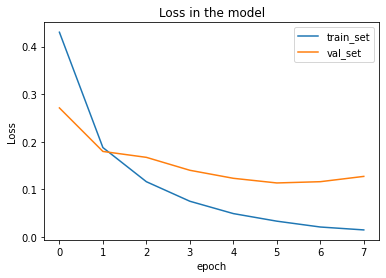

In [258]:
#plot for loss and training epochs of error rate for training set and validation set

plt.plot(out.history['loss'])
plt.plot(out.history['val_loss'])
plt.title('Loss in the model')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train_set', 'val_set'], loc='upper right')
    


### 2.  Regularisation experiment:  ***12 marks***

Now select a type of regularisation (which may be L2, or dropout) and train your initial model with different amounts of regularisation. 

For L2 regularisation, compare 0 regularisation with very small amounts of regularisation -- try 0.0001, 0.001, 0.01, and see for what level of L2 regularisation there starts to be an effect. 

A small amount of regularisation may improve the validation set performance of your overfitted model; too much regularisation may make performance on the validation set worse. 

Train your model multiple times, applying different amounts of regularisation, and plot a graph showing the effect of different amounts of regularisation. 

Plot the amount of regularisation along the x axis, and the validation set performance (loss/error-rate) on the y axis.  How does regularisation affect the performance of your initial network, and what is the optimal amount? 

In [265]:
# Building Cnn 
def CNN2(X_train,Y_train,X_test,Y_test):
    
    model = Sequential()
    
    #convolutional layer
    model.add(Conv2D(10, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
    model.add(MaxPool2D(pool_size=(1,1)))
    
    #adding 1droput layer
    model.add(Dropout(0.3))
    model.add(Flatten())
    
    # hidden layer
    model.add(Dense(100, activation='relu'))
    
    #2 Dropout layer
    model.add(Flatten())
    model.add(Dropout(0.3))
    model.add(Dense(10, activation='softmax'))
    
    # training model on epochs
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='rmsprop')
    
    #fitting model
    out1 = model.fit(X_train, Y_train, batch_size=80, epochs= 8, validation_data =(X_test,Y_test))
    score = model.evaluate(X_test,Y_test,batch_size = 80)
    print("\n")
    print("Validation_loss is = ",score[0])
    print("\n")
    print("Accuracy is = ",score[1])
    return out1

Epoch 1/8
150/150 [==============================] - 4s 25ms/step - loss: 0.8964 - accuracy: 0.7362 - val_loss: 0.2674 - val_accuracy: 0.9206
Epoch 2/8
150/150 [==============================] - 3s 22ms/step - loss: 0.2622 - accuracy: 0.9192 - val_loss: 0.1845 - val_accuracy: 0.9452
Epoch 3/8
150/150 [==============================] - 3s 23ms/step - loss: 0.1786 - accuracy: 0.9452 - val_loss: 0.1467 - val_accuracy: 0.9558
Epoch 4/8
150/150 [==============================] - 3s 23ms/step - loss: 0.1410 - accuracy: 0.9606 - val_loss: 0.1348 - val_accuracy: 0.9587
Epoch 5/8
150/150 [==============================] - 3s 23ms/step - loss: 0.1079 - accuracy: 0.9657 - val_loss: 0.1207 - val_accuracy: 0.9634
Epoch 6/8
150/150 [==============================] - 3s 23ms/step - loss: 0.0954 - accuracy: 0.9720 - val_loss: 0.1117 - val_accuracy: 0.9650
Epoch 7/8
150/150 [==============================] - 3s 23ms/step - loss: 0.0725 - accuracy: 0.9755 - val_loss: 0.1133 - val_accuracy: 0.9635
Epoch 

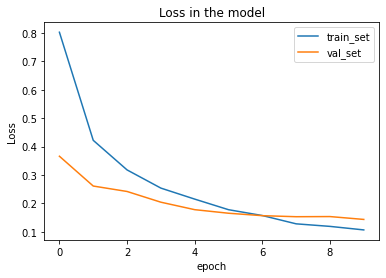

In [266]:
#calling function for model and printing accuracy and epochs with graph with dropout
out1 = CNN2(X_train,Y_train,X_test,Y_test)

plt.plot(out2.history['loss'])
plt.plot(out2.history['val_loss'])
plt.title('Loss in the model')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train_set', 'val_set'], loc='upper right')
    


As we can see that there there is slight decrease in the validation loss by adding Dropout and changing activation function and slight increase in accuracy on data. Tried different activation function and batch size on this part (only this part worked effiectly all other were giving the same results or either decreasing the results(loss validation and accuracy)).

The optimal value by using droput (0.3) is 16% and it is decreasing the loss on with dropout, and also increasing the accuracy.

### 3.  Learning curve experiment:  ***12 marks***

Now train your model (with the amount of regularisation you selected) on different amounts of training data. 

Plot the performance (loss/error-rate) of the model on the validation set against the size of the training set. 
This is typically best done on a log-log plot. 

Describe the approximate relationship between the training set size and loss / error-rate.  Does the network performance appear to improve as some power of the amount of data in the training set?  If so, by what power ? 

For example, a very good rate of improvement is for error-rate to be proportional to $\dfrac{1}{\sqrt{n}}$ where $n$ is the training set size.  For your model, the rate of improvement of validation error with training set size may not be as fast as this (or it may, who knows?)  The aim of this exercise is to find out what it actually is. 

In [274]:

#on cnn model     
def CNN(X_train,Y_train,X_test,Y_test):
    
    model = Sequential()
    
    model.add(Conv2D(10, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
    model.add(MaxPool2D(pool_size=(1,1)))
    
    model.add(Flatten())
    
    # hidden layer
    model.add(Dropout(0.3))
    model.add(Dense(100, activation='relu'))
    
    # hidden layer
    model.add(Flatten())
    model.add(Dropout(0.3))
    model.add(Dense(10, activation='softmax'))

    # training model on epochs
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='rmsprop')
    
    out2 = model.fit(X_train, Y_train, batch_size=80, epochs= 8, validation_data =(X_test,Y_test))
    score = model.evaluate(X_test,Y_test,batch_size = 80)
    print("\n")
    print("Val_loss is = ",score[0])
    print("\n")
    print("Accuracy is = ",score[1])
    
    return out2    


In [328]:
t_size = [2000, 4000, 6000, 8000, 10000]
cnn = []
for i in range(5):
    arr = CNN(X_train[0:t_size[i]],Y_train[0:t_size[i]], X_test, Y_test)
    cnn.append(arr)

Epoch 1/8
25/25 [==============================] - 3s 98ms/step - loss: 1.5065 - accuracy: 0.5062 - val_loss: 0.5264 - val_accuracy: 0.8543
Epoch 2/8
25/25 [==============================] - 2s 85ms/step - loss: 0.5284 - accuracy: 0.8555 - val_loss: 0.4116 - val_accuracy: 0.8780
Epoch 3/8
25/25 [==============================] - 2s 85ms/step - loss: 0.3807 - accuracy: 0.8854 - val_loss: 0.3607 - val_accuracy: 0.8917
Epoch 4/8
25/25 [==============================] - 2s 84ms/step - loss: 0.2970 - accuracy: 0.9189 - val_loss: 0.3209 - val_accuracy: 0.9063
Epoch 5/8
25/25 [==============================] - 2s 84ms/step - loss: 0.2410 - accuracy: 0.9272 - val_loss: 0.3382 - val_accuracy: 0.9008
Epoch 6/8
25/25 [==============================] - 2s 85ms/step - loss: 0.2095 - accuracy: 0.9400 - val_loss: 0.2986 - val_accuracy: 0.9105
Epoch 7/8
25/25 [==============================] - 2s 84ms/step - loss: 0.1734 - accuracy: 0.9501 - val_loss: 0.2986 - val_accuracy: 0.9087
Epoch 8/8
125/125 [=

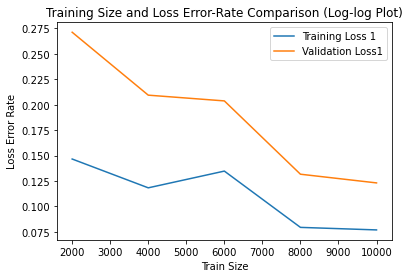

In [329]:
def learning_curve(p, t_size):
    a = []
    loss_set = []
    val_set = []
    for i in range(len(t_size)):   
        a.append("Training Loss "+str(i+1))
        a.append("Validation Loss"+str(i+1))
        loss_set.append(p[i].history['loss'][-1])
        val_set.append(p[i].history['val_loss'][-1])
    plt.plot(t_size,loss_set)
    plt.plot(t_size,val_set) 
    plt.legend(a, loc='upper right')
    plt.title('Training Size and Loss Error-Rate Comparison (Log-log Plot)')
    plt.ylabel('Loss Error Rate')
    plt.xlabel('Train Size')
    plt.show()

learning_curve(cnn,t_size)

By choosing the same model we can see that there is slight increase in loss_rate as well as accuracy on the data is also increasing. Loss is increased by 0.02 percent which means as the training size increases loss error rate on the graph decreases exponentially. 

At some point there is some increase in loss as well as accuracy but at the end loss error rate is decreasing on graph because on train data size. 

So there is some increase in accuracy according to the plot.

### 4. Second model:   *** 14 marks ***

Devise what you believe to be a better neural network architecture for the problem (e.g. for MNIST you might use a fully-connected network for your initial model, and then try a convolutional net for your second model).

Repeat sections 2 (regularisation experiment), and determine whether it has better validation set performance than the first model, for an intermediate size of training set (e.g. 2000 or 4000 for the MNIST data). 

Repeat section 3. Does your model have a different learning curve from the first? Plot the learning curves for the first and second model on the same graph, to compare them. Comment: is there a more rapid reduction of error-rate with training set size for your second model?  

In [290]:
#same data with other var names
(X_train1, Y_train1), (X_test1, Y_test1) = mnist.load_data()

X_train1 = X_train1[0:12000]
Y_train1 = Y_train1[0:12000]
print(X_train1.shape)
print(Y_train1.shape)
print(X_test1.shape)
print(Y_test1.shape)

# Flattening the images from the 28x28 pixels to 1D 787 pixels
X_train1 = X_train1.reshape(12000, 784)
X_test1 = X_test1.reshape(10000, 784)


# normalizing the data of mnist
X_train1 = X_train1 / 255
X_test1 = X_test1 / 255
    
    
# one-hot encoding using keras' numpy-related utilities
class_n = 10
print("Shape of one-hot encoding: ", Y_train1.shape)
Y_train1 = keras.utils.to_categorical(Y_train1, class_n)
Y_test1 = keras.utils.to_categorical(Y_test1, class_n)
print("Shape after one-hot encoding: ", Y_train1.shape)


(12000, 28, 28)
(12000,)
(10000, 28, 28)
(10000,)
Shape of one-hot encoding:  (12000,)
Shape after one-hot encoding:  (12000, 10)


In [291]:
def MLP_withoutdropout(X_train1,Y_train1,X_test1,Y_test1):
    
    #You can also simply add layers via the .add() method:
    model = Sequential()
    model.add(Dense(100, input_shape=(784,), activation='relu'))
    
    model.add(Dense(100, activation='relu'))
    
    model.add(Dense(10, activation='softmax'))
    #model.add(Dense(10, activation='relu'))
    # compiling the sequential model
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='rmsprop')
    
    # training the model for 10 epochs
    out3 = model.fit(X_train1, Y_train1, batch_size=80, epochs=8, validation_data=(X_test1, Y_test1))
    score1 = model.evaluate(X_test1,Y_test1,batch_size = 80)
    print("\n")
    print("Val_loss is = ",score1[0])
    print("\n")
    print("Accuracy is = ",score1[1])
    return out3

Epoch 1/8
150/150 [==============================] - 1s 3ms/step - loss: 0.9181 - accuracy: 0.7524 - val_loss: 0.3750 - val_accuracy: 0.8840
Epoch 2/8
150/150 [==============================] - 0s 2ms/step - loss: 0.2714 - accuracy: 0.9207 - val_loss: 0.2667 - val_accuracy: 0.9208
Epoch 3/8
150/150 [==============================] - 0s 2ms/step - loss: 0.1901 - accuracy: 0.9459 - val_loss: 0.2259 - val_accuracy: 0.9338
Epoch 4/8
150/150 [==============================] - 0s 2ms/step - loss: 0.1457 - accuracy: 0.9580 - val_loss: 0.1983 - val_accuracy: 0.9393
Epoch 5/8
150/150 [==============================] - 0s 2ms/step - loss: 0.1173 - accuracy: 0.9682 - val_loss: 0.1782 - val_accuracy: 0.9467
Epoch 6/8
150/150 [==============================] - 0s 2ms/step - loss: 0.0914 - accuracy: 0.9742 - val_loss: 0.1716 - val_accuracy: 0.9487
Epoch 7/8
150/150 [==============================] - 0s 2ms/step - loss: 0.0791 - accuracy: 0.9776 - val_loss: 0.1893 - val_accuracy: 0.9436
Epoch 8/8
125

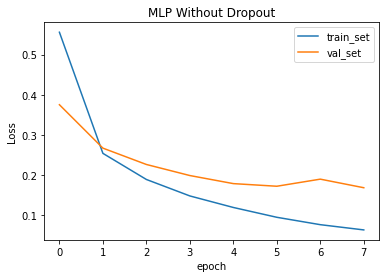

In [292]:
out3 = MLP_withoutdropout(X_train1,Y_train1,X_test1,Y_test1)


plt.plot(out3.history['loss'])
plt.plot(out3.history['val_loss'])
plt.title('MLP Without Dropout')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train_set', 'val_set'], loc='upper right')
    


In [325]:
def MLP_withdropout(X_train1,Y_train1,X_test1,Y_test1):
    
    #You can also simply add layers via the .add() method:
    model = Sequential()
    model.add(Dense(100, input_shape=(784,), activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='relu'))
    
    model.add(Flatten())
    model.add(Dropout(0.3))
    model.add(Dense(100, activation='sigmoid'))
    
    model.add(Flatten())
    model.add(Dropout(0.3))
    model.add(Dense(10, activation='sigmoid'))

    
    # compiling the sequential model
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    # training the model for 10 epochs
    out3 = model.fit(X_train1, Y_train1, batch_size=80, epochs=10, validation_data=(X_test1, Y_test1))
    score1 = model.evaluate(X_test1,Y_test1,batch_size = 80)
    print("\n")
    print("Val_loss is = ",score1[0])
    print("\n")
    print("Accuracy is = ",score1[1])
    return out3

In [326]:
t_size1 = [1000, 3000, 5000, 7000, 9000]
mlp = []
for i in range(5):
    hist = MLP_withdropout(X_train1[0:t_size[i]],Y_train1[0:t_size[i]], X_test1, Y_test1)
    mlp.append(hist)

Epoch 1/10
13/13 [==============================] - 1s 32ms/step - loss: 2.5692 - accuracy: 0.0986 - val_loss: 2.1843 - val_accuracy: 0.3238
Epoch 2/10
13/13 [==============================] - 0s 10ms/step - loss: 2.2045 - accuracy: 0.2327 - val_loss: 1.8961 - val_accuracy: 0.4879
Epoch 3/10
13/13 [==============================] - 0s 10ms/step - loss: 1.9188 - accuracy: 0.3633 - val_loss: 1.5199 - val_accuracy: 0.5769
Epoch 4/10
13/13 [==============================] - 0s 10ms/step - loss: 1.5444 - accuracy: 0.5417 - val_loss: 1.1773 - val_accuracy: 0.6838
Epoch 5/10
13/13 [==============================] - 0s 10ms/step - loss: 1.2613 - accuracy: 0.6375 - val_loss: 0.9525 - val_accuracy: 0.7732
Epoch 6/10
13/13 [==============================] - 0s 10ms/step - loss: 1.0565 - accuracy: 0.7172 - val_loss: 0.7954 - val_accuracy: 0.8022
Epoch 7/10
13/13 [==============================] - 0s 10ms/step - loss: 0.8755 - accuracy: 0.7718 - val_loss: 0.7027 - val_accuracy: 0.8254
Epoch 8/10
13

Epoch 1/10
150/150 [==============================] - 1s 4ms/step - loss: 1.7550 - accuracy: 0.4061 - val_loss: 0.4609 - val_accuracy: 0.8736
Epoch 2/10
150/150 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.8504 - val_loss: 0.2971 - val_accuracy: 0.9130
Epoch 3/10
150/150 [==============================] - 0s 2ms/step - loss: 0.3614 - accuracy: 0.8939 - val_loss: 0.2476 - val_accuracy: 0.9260
Epoch 4/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2806 - accuracy: 0.9224 - val_loss: 0.2384 - val_accuracy: 0.9278
Epoch 5/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2327 - accuracy: 0.9338 - val_loss: 0.2069 - val_accuracy: 0.9383
Epoch 6/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9399 - val_loss: 0.1931 - val_accuracy: 0.9427
Epoch 7/10
150/150 [==============================] - 0s 2ms/step - loss: 0.1900 - accuracy: 0.9474 - val_loss: 0.1829 - val_accuracy: 0.9464
Epoch 

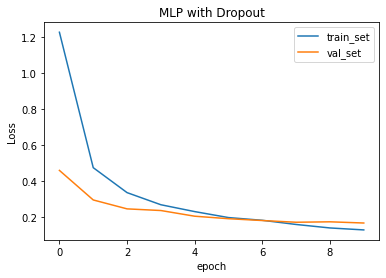

In [327]:
out3 = MLP_withdropout(X_train1,Y_train1,X_test1,Y_test1)


plt.plot(out3.history['loss'])
plt.plot(out3.history['val_loss'])
plt.title('MLP with Dropout')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train_set', 'val_set'], loc='upper right')

As we add add model with specific train size and dropout we can see there is decrease in error rate and increase in accuracy. By adding more layers in this it can increase the accuracy same is for epochs. We can see that for With dropout it is increasing accuracy and without dropout the accuracy is less in previous part.  

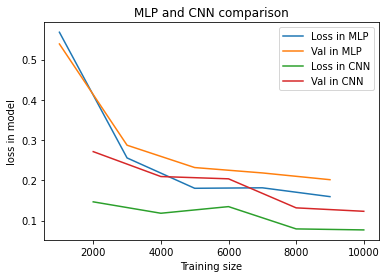

In [330]:
#empty array for everything
loss_in_mlp = []
loss_in_cnn = []
val_in_mlp = []
val_in_cnn = []


for i in range(len(t_size)):
    loss_in_cnn.append(cnn[i].history['loss'][-1])
    val_in_cnn.append(cnn[i].history['val_loss'][-1])
    loss_in_mlp.append(mlp[i].history['loss'][-1])
    val_in_mlp.append(mlp[i].history['val_loss'][-1])
plt.plot(t_size1, loss_in_mlp)
plt.plot(t_size1, val_in_mlp)
plt.plot(t_size, loss_in_cnn)
plt.plot(t_size, val_in_cnn)

plt.title('MLP and CNN comparison')
plt.xlabel('Training size')
plt.ylabel('loss in model')
plt.legend(['Loss in MLP', 'Val in MLP','Loss in CNN', 'Val in CNN'], loc='upper right')
plt.show()